In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

video_dir = '/content/drive/MyDrive/Datasets/Shot Detection/'
os.listdir(video_dir)

['bbc_01.mp4']

In [4]:
video_path = os.path.join(video_dir, 'bbc_01.mp4')
print(f'Video path: {video_path}')

Video path: /content/drive/MyDrive/Datasets/Shot Detection/bbc_01.mp4


In [7]:
import cv2
import numpy as np
import pandas as pd

cap = cv2.VideoCapture(video_path)

# Parameters
hist_threshold = 300  # Adjusted threshold for chi-square method

# Get the frame rate of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Read first frame
ret, prev_frame = cap.read()
if not ret:
    print("Failed to read the first frame.")
    cap.release()
    cv2.destroyAllWindows()
    exit()

prev_hist = cv2.calcHist([prev_frame], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
cv2.normalize(prev_hist, prev_hist)

frame_number = 0

# Initialize lists to store shot data
shot_frames = []
shot_times = []
shot_hist_diffs = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_number += 1

    # Calculate histogram for current frame
    curr_hist = cv2.calcHist([frame], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(curr_hist, curr_hist)

    # Calculate histogram difference using chi-square method
    hist_diff = cv2.compareHist(prev_hist, curr_hist, cv2.HISTCMP_CHISQR)

    # Check if histogram exceeds the threshold
    if hist_diff > hist_threshold:
        # Calculate timestamp
        timestamp = frame_number / fps
        shot_frames.append(frame_number)
        shot_times.append(timestamp)
        shot_hist_diffs.append(hist_diff)

    prev_hist = curr_hist

cap.release()
cv2.destroyAllWindows()

# Convert the lists to a pandas DataFrame
df = pd.DataFrame({
    'Frame Number': shot_frames,
    'Time': shot_times,
    'Histogram Difference': shot_hist_diffs
})

print(df)

    Frame Number     Time  Histogram Difference
0            650    26.00           7760.921904
1           1569    62.76            549.498974
2           2111    84.44           2196.632961
3           5082   203.28            661.512292
4           5600   224.00           6903.765305
..           ...      ...                   ...
66         70450  2818.00           4561.176690
67         70577  2823.08           1058.074138
68         70708  2828.32            608.994720
69         70848  2833.92           1157.810664
70         71999  2879.96           1324.770305

[71 rows x 3 columns]


In [8]:
df.head(10)

,Frame Number,Time,Histogram Difference
0,650,26.00,7760.921904
1,1569,62.76,549.498974
2,2111,84.44,2196.632961
3,5082,203.28,661.512292
4,5600,224.00,6903.765305
5,6327,253.08,11953.415497
6,9028,361.12,397.231097
7,9814,392.56,1238.245022
8,13939,557.56,442.873835
9,14083,563.32,449.813935


from matplotlib import pyplot as plt
_df_0['Frame Number'].plot(kind='hist', bins=20, title='Frame Number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Histogram Difference'].plot(kind='hist', bins=20, title='Histogram Difference')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Frame Number', y='Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Time', y='Histogram Difference', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Frame Number']
  ys = series['Histogram Difference']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Frame Number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Frame Number')
_ = plt.ylabel('Histogram Difference')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Frame Number']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Frame Number'}, axis=1)
              .sort_values('Frame Number', ascending=True))
  xs = counted['Frame Number']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Frame Number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Frame Number')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['Histogram Difference']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Histogram Difference')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['Frame Number'].plot(kind='line', figsize=(8, 4), title='Frame Number')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Histogram Difference'].plot(kind='line', figsize=(8, 4), title='Histogram Difference')
plt.gca().spines[['top', 'right']].set_visible(False)

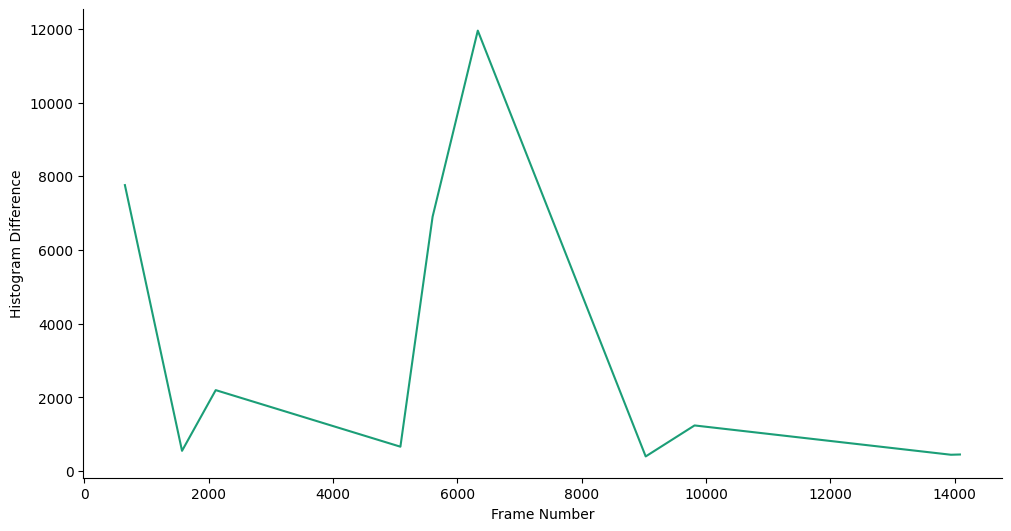

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Frame Number']
  ys = series['Histogram Difference']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Frame Number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Frame Number')
_ = plt.ylabel('Histogram Difference')

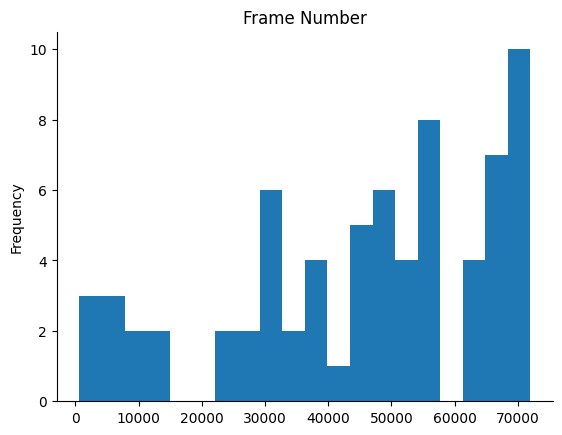

In [11]:
# @title Frame Number

from matplotlib import pyplot as plt
df['Frame Number'].plot(kind='hist', bins=20, title='Frame Number')
plt.gca().spines[['top', 'right',]].set_visible(False)

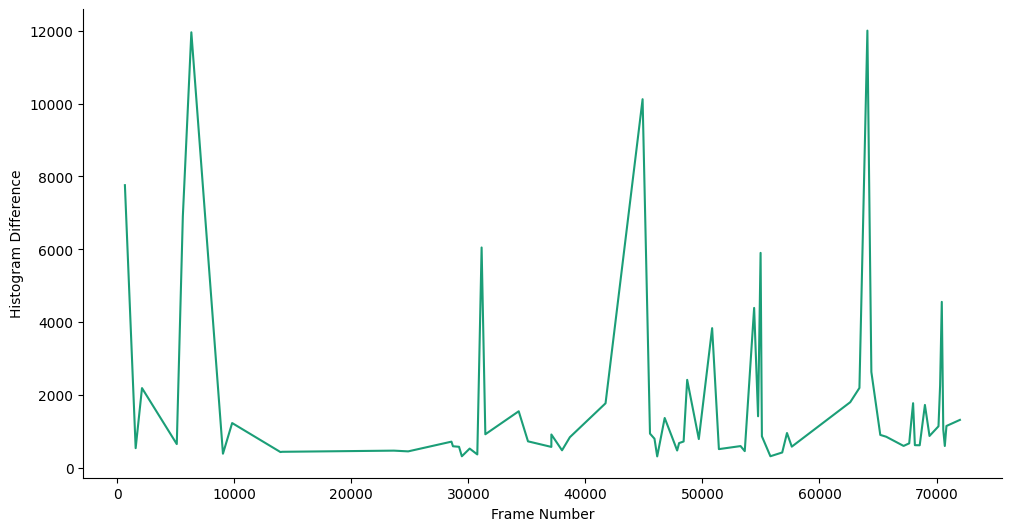

In [9]:
# @title Frame Number vs Histogram Difference

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Frame Number']
  ys = series['Histogram Difference']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Frame Number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Frame Number')
_ = plt.ylabel('Histogram Difference')